In [1]:
# import libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

/var/folders/9z/v2g_zsyn4m11dzc06c73_bbm0000gn/T/ipykernel_66775/2548364923.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load data for each city:


In [25]:
ams = pd.read_csv('Final_project_data/clean_data/ams.csv')
utrecht = pd.read_csv('Final_project_data/clean_data/utrecht.csv')
eindhoven = pd.read_csv('Final_project_data/clean_data/eindhoven.csv')
nijmegen = pd.read_csv('Final_project_data/clean_data/nijmegen.csv')
rot = pd.read_csv('Final_project_data/clean_data/rotterdam.csv')
almere = pd.read_csv('Final_project_data/clean_data/almere.csv')
maas= pd.read_csv('Final_project_data/clean_data/maastricht.csv')
leeu= pd.read_csv('Final_project_data/clean_data/leeuwarden.csv')

data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]


In [19]:
ams.head()

,house_id,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,address,year_built,house_age,descrip,photo,on_market
0,42315941,amsterdam,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,A,1067,Lambertus Zijlplein 43,2006,18,---English translation Below--- Nu bij ons ...,https://cloud.funda.nl/valentina_media/183/273...,2024
1,42397060,amsterdam,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,B,1053,Tollensstraat 116,1979,45,"Een mooie keuken met kookeiland, moderne ba...",https://cloud.funda.nl/valentina_media/182/529...,2024
2,42398649,amsterdam,huis,Bestaande bouw,675000,5769.2,4,3,1,117,B,1034,John Kellypad 1,1995,29,Heerlijk licht en ruim familiehuis met tuin...,https://cloud.funda.nl/valentina_media/182/556...,2024
3,42343876,amsterdam,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,D,1073,Mauvestraat 45 1,1922,102,**English translation below** Dit kant-en-kl...,https://cloud.funda.nl/valentina_media/184/783...,2024
4,42747045,amsterdam,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,na,1101,SPOT Amsterdam | Toren A1 (Bouwnr. 117),2022,2,SPOT Amsterdam | Toren A1 DE BOUW IS GESTA...,https://cloud.funda.nl/valentina_media/159/938...,2024


# data cleaning

1. drop unneccessary cols: 'house_id', 'descrip', 'photo', 'zip', 'adress', 'year_built'


# work with data from Amsterdam

In [26]:
df_all = ams

# drop columns:'city', 'house_id', 'descrip', 'photo', 'house_age', 'address'


In [51]:
# drop columns: house_id, descrip, photo, year_built, zip, address from the combined df
df_all.head()
df_all_drop_2 =  df_all.drop(columns = ['city', 'house_id', 'descrip', 'photo', 'house_age', 'address']).reset_index(drop=True )

In [46]:
df_all_drop_2[df_all_drop_2.year_built==0]

,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,on_market
16,amsterdam,appartement,Nieuwbouw,1119000,6048.6,4,3,2,185,A,1101,0,2024
30,amsterdam,appartement,Bestaande bouw,400000,8695.7,2,1,1,46,D,1073,0,2024
82,amsterdam,appartement,Bestaande bouw,1775000,8492.8,5,4,1,209,C,1018,0,2024
93,amsterdam,appartement,Nieuwbouw,940000,10329.7,3,2,1,91,>A+,1096,0,2024
95,amsterdam,appartement,Bestaande bouw,1250000,7622.0,6,3,0,164,na,1015,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,amsterdam,huis,Bestaande bouw,800000,7767.0,5,3,1,103,D,1025,0,2023
4203,amsterdam,appartement,Bestaande bouw,560000,9491.5,4,2,1,59,D,1073,0,2023
4269,amsterdam,appartement,Bestaande bouw,1295000,9522.1,4,3,2,136,A,1054,0,2023
4334,amsterdam,appartement,Bestaande bouw,435000,10875.0,2,1,1,40,D,1016,0,2023


In [52]:
# set df ams1 after dropping columns
ams1 = df_all_drop_2
ams1.head()

,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,on_market
0,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,A,1067,2006,2024
1,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,B,1053,1979,2024
2,huis,Bestaande bouw,675000,5769.2,4,3,1,117,B,1034,1995,2024
3,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,D,1073,1922,2024
4,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,na,1101,2022,2024


In [28]:
# function for distribution plots:
def dist_plot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.histplot(df[col], legend=col, ax = ax[i])
	plt.tight_layout()
	plt.show()


# function for boxplots:
def boxplot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.boxplot(df[col], ax = ax[i])
	plt.tight_layout()
	plt.show()


In [53]:
# encode ordinal categorical energy_label: >A+ > A > B > C > D > E > F > G > na (missing info equal 0)

ams1['energy_label'] = ams1['energy_label'].apply(lambda x: 1 if x == 'G' else 
                                                                                        ( 2 if x == 'F' 
                                                                                        else ( 3 if x == 'E' 
                                                                                        else (4 if x == 'D' 
                                                                                        else (5 if x == 'C' 
                                                                                        else (6 if x == 'B'
                                                                                        else (7 if x == 'A'
                                                                                        else (8 if x == '>A+' 
                                                                                        else 0 ) )))))))
ams1.energy_label.value_counts(dropna=False)

energy_label
0    1087
5     820
7     796
6     503
4     460
8     365
3     199
2      85
1      71
Name: count, dtype: int64

In [54]:
# change name df ams1 to house, so that can just run all the cells below
house = ams1

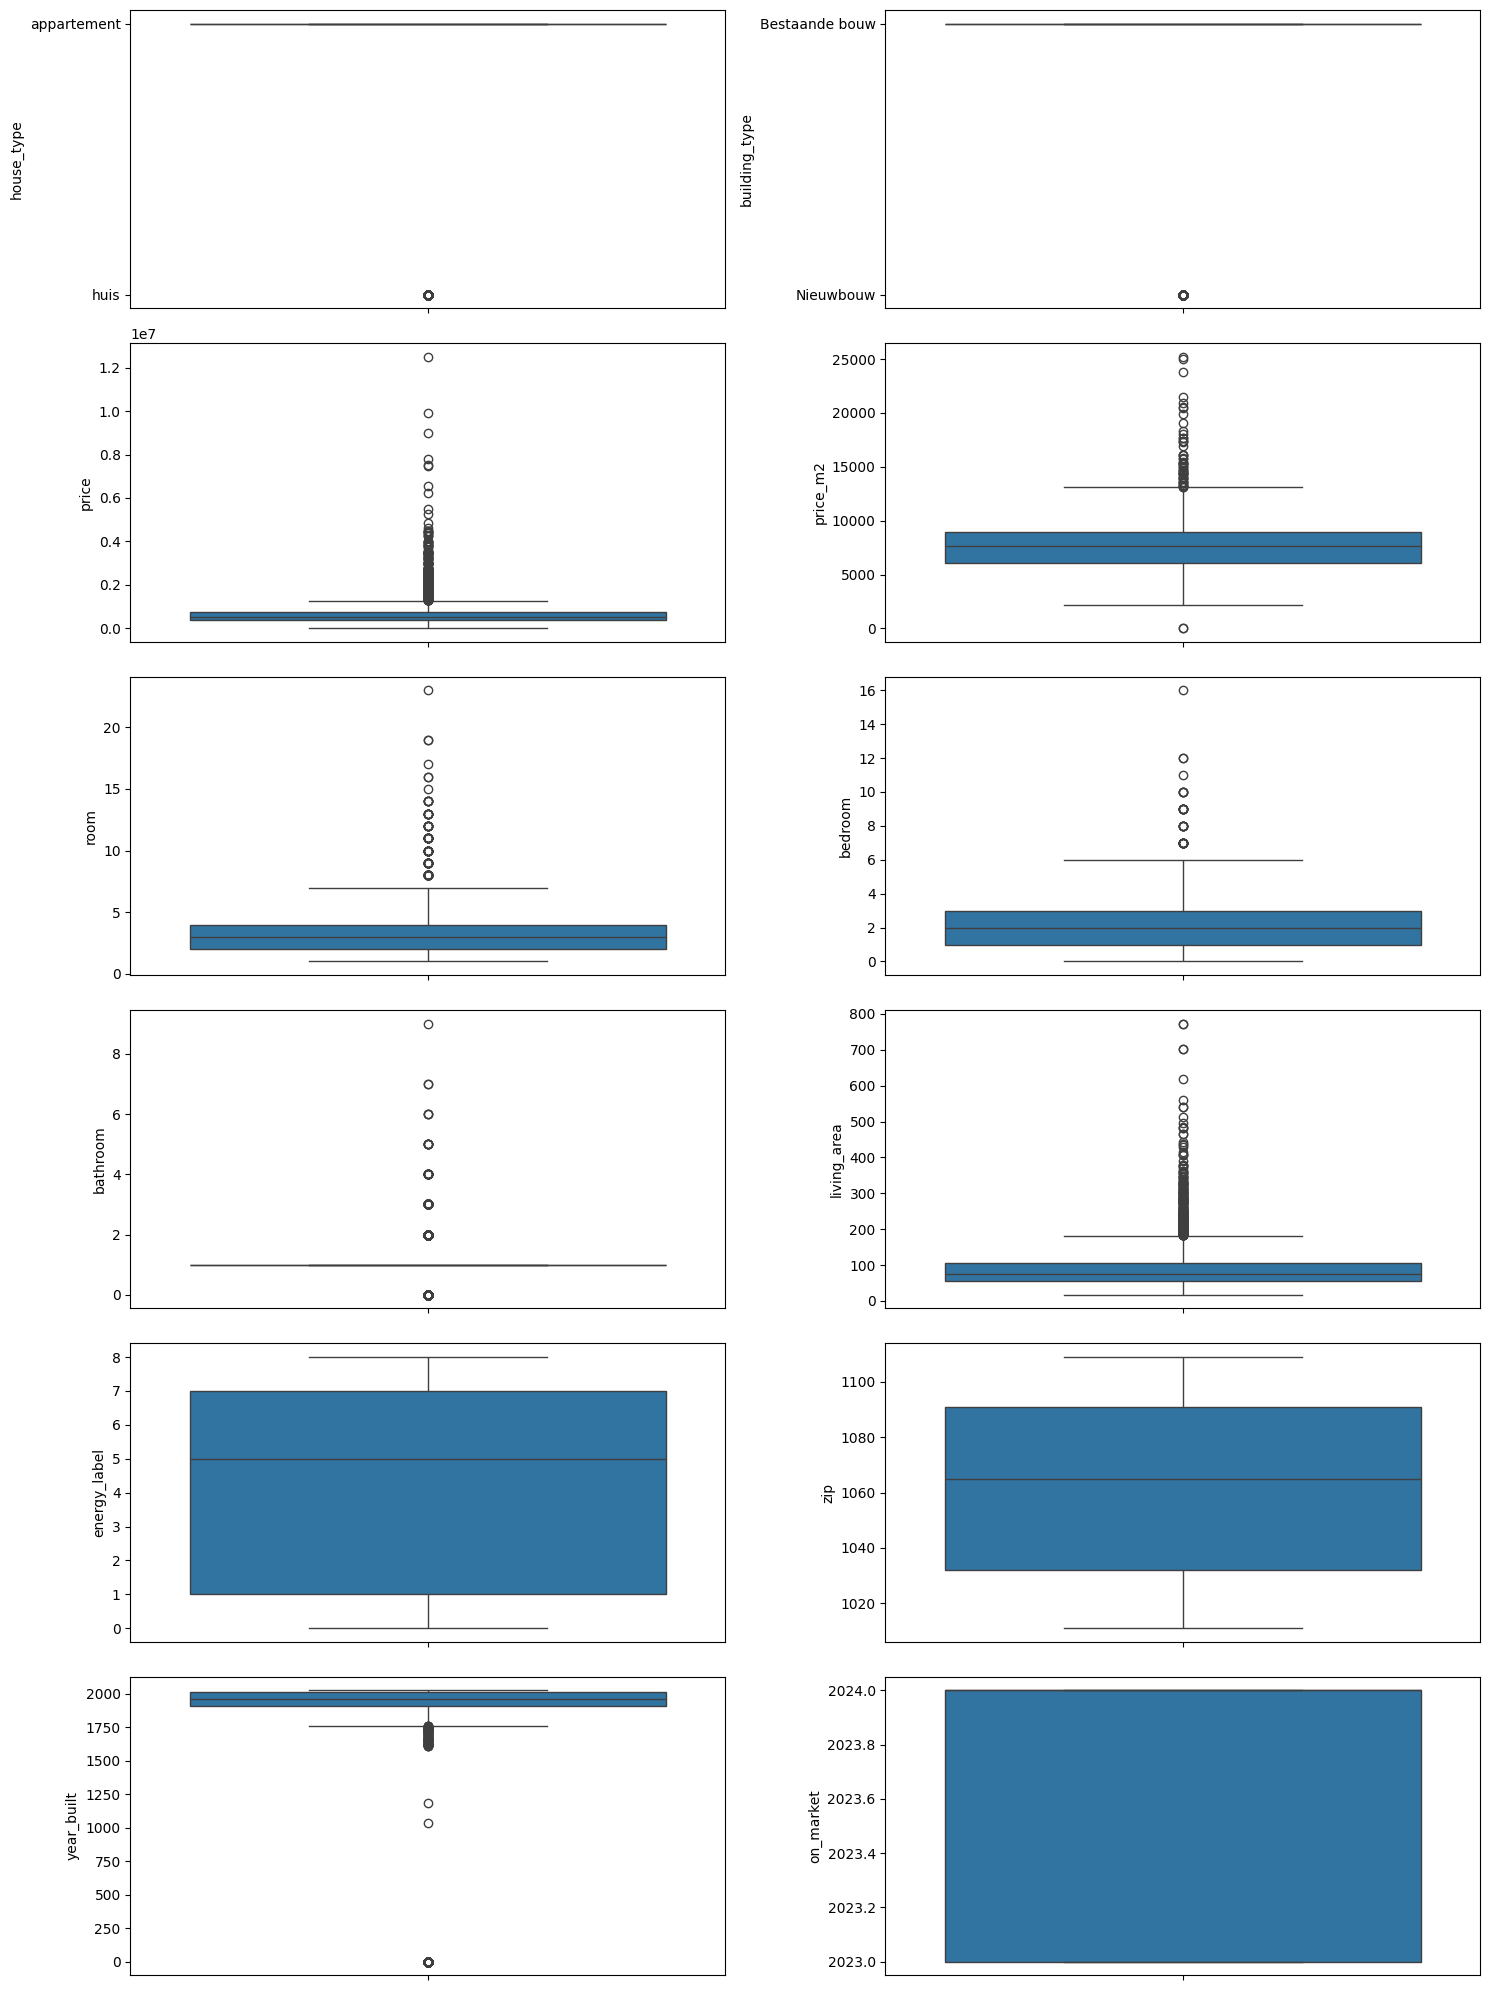

In [55]:
boxplot(house)

In [62]:
# label encoder for zip code

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(house['zip'])
house['zip'] = le.transform(house['zip'])
house.head()


,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,on_market
0,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,7,40,2006,2024
1,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,6,26,1979,2024
2,huis,Bestaande bouw,675000,5769.2,4,3,1,117,6,20,1995,2024
3,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,4,45,1922,2024
4,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,0,65,2022,2024


In [63]:
house.zip.nunique()

74

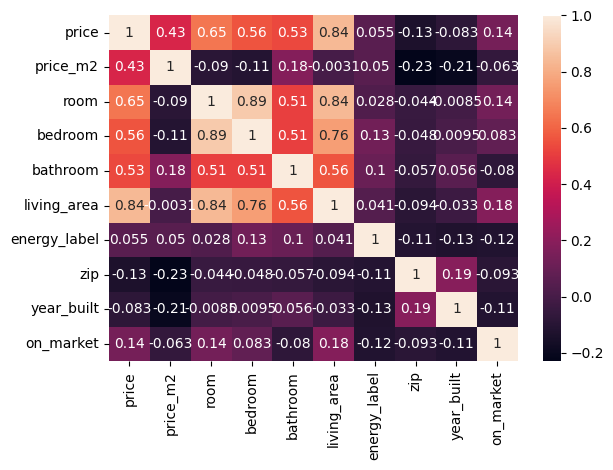

In [134]:
# check correlation
house.select_dtypes(np.number).corr()
sns.heatmap(house.select_dtypes(np.number).corr(), annot=True)
plt.tight_layout()
plt.show()

# X/y split

In [186]:
X = house.drop(['price', 'price_m2', 'on_market'], axis = 1)
y1 = house['price']
y2 = house['price_m2']

# train/test split

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 73)

In [188]:
X_train.head()

,house_type,building_type,room,bedroom,bathroom,living_area,energy_label,zip,year_built
2857,appartement,Nieuwbouw,3,2,0,78,0,18,2024
716,appartement,Bestaande bouw,4,3,1,126,5,28,1910
2352,appartement,Nieuwbouw,1,1,1,44,0,62,2024
1871,appartement,Bestaande bouw,4,3,1,112,0,67,1974
2074,appartement,Bestaande bouw,3,2,1,97,0,4,0


# split numerical and categorical variables

In [189]:
# split cat and num variables for train and test sets
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)


X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

# encoding categorical variables
city, house_type, and building_type

In [224]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown = 'error')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out(), index = X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out(), index = X_test_cat.index)

X_train_cat_encoded_df.head()

,house_type_huis,building_type_Nieuwbouw
2857,0.0,1.0
716,0.0,0.0
2352,0.0,1.0
1871,0.0,0.0
2074,0.0,0.0


# apply PowerTransformer to minimize skewness of numerical cols:
room, bedroom, bathroom, living_area, energy_label (ordinal categorical), house_age, city_price_ratio (ordinal categorical)

In [191]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_num)

X_train_num_pt = pt.transform(X_train_num)
X_test_num_pt = pt.transform(X_test_num)

X_train_num_pt_df = pd.DataFrame(X_train_num_pt, columns = X_train_num.columns, index = X_train_num.index)
X_test_num_pt_df = pd.DataFrame(X_test_num_pt, columns = X_test_num.columns, index = X_test_num.index)

X_train_num_pt_df.head()

,room,bedroom,bathroom,living_area,energy_label,zip,year_built
2857,-0.087517,0.030814,-1.998512,0.036549,-1.519614,-0.807349,0.530350
716,0.596801,0.776196,0.080844,0.937087,0.286000,-0.314620,0.018373
2352,-2.709945,-0.953181,0.080844,-1.236096,-1.519614,1.123008,0.530350
1871,0.596801,0.776196,0.080844,0.728741,-1.519614,1.315658,0.301699
2074,-0.087517,0.030814,0.080844,0.463310,-1.519614,-1.637878,-3.893557


# combine categorical and numerical again

In [192]:
X_train = pd.concat([X_train_cat_encoded_df, X_train_num_pt_df], axis = 1)
X_test = pd.concat([X_test_cat_encoded_df, X_test_num_pt_df], axis = 1)
display(X_train.head())
display(X_test.head())

,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built
2857,0.0,1.0,-0.087517,0.030814,-1.998512,0.036549,-1.519614,-0.807349,0.530350
716,0.0,0.0,0.596801,0.776196,0.080844,0.937087,0.286000,-0.314620,0.018373
2352,0.0,1.0,-2.709945,-0.953181,0.080844,-1.236096,-1.519614,1.123008,0.530350
1871,0.0,0.0,0.596801,0.776196,0.080844,0.728741,-1.519614,1.315658,0.301699
2074,0.0,0.0,-0.087517,0.030814,0.080844,0.463310,-1.519614,-1.637878,-3.893557


,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built
565,0.0,0.0,-1.077601,-0.953181,0.080844,-1.128905,-0.435925,-0.457337,-0.007652
3048,0.0,0.0,-1.077601,-0.953181,0.080844,-1.077571,-0.074927,-0.314620,0.079455
2955,0.0,1.0,-0.087517,0.030814,0.080844,0.036549,-1.519614,1.123008,0.530350
3443,0.0,1.0,-1.077601,-0.953181,0.080844,-1.027649,-1.519614,1.123008,0.530350
2777,0.0,0.0,-0.087517,0.030814,0.080844,-0.377428,1.007685,-1.637878,-0.068021


# adjust scale for all cols using MinMaxScaler:

In [193]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns, index =  X_test.index)

# Model: LinearRegression

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled_df, y1_train)
display(lm.intercept_)
display(lm.coef_)


-373867.6957664216

array([ -70940.89167781,   11652.17983694,  148033.13452995,
       -180058.65242925, 1434295.87244424, 2311969.03762749,
       -100588.03360298, -197193.26094464, -253820.51970347])

In [73]:
y1_train_real = y1_train.tolist()
y1_train_pred = lm.predict(X_train_scaled_df)

y1_test_real = y1_test.tolist()
y1_test_pred = lm.predict(X_test_scaled_df)


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes 4 list inputs: y_real_train, y_real_test
    y_pred_train, y_predict_test, and compute and return a report 
    with error metrics calculation of your model. 
    Input:
    y_real_train: list
    y_real_test: list
    y_pred_train: list
    y_pred_test: list
    Output:
    pd.DataFrame
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared =False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test,squared =False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [75]:
error_metrics_report(y_real_train=y1_train_real, y_pred_train=y1_train_pred, y_pred_test=y1_test_pred, y_real_test=y1_test_real)

/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Train,Test
0,MAE,2.364909e+05,2.355684e+05
1,MSE,2.108733e+11,1.681571e+11
2,RMSE,4.592094e+05,4.100696e+05
3,R2,4.800000e-01,5.500000e-01


In [76]:
lm_score_test = lm.score(X_test_scaled_df, y1_test)
print("The R2 of the linnear model is {:.2f}".format(lm_score_test))

The R2 of the linnear model is 0.55


# Model: KNNRegression

In [194]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled_df, y1_train)

KNeighborsRegressor(n_neighbors=3)

In [195]:
knn_score = knn.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

The R2 of the k-NN model is 0.73


In [196]:
#knn_models = [] # knn_models = [ model_k_2, model_k_3,...]
knn_models = {} # keys = k_distance_p, value = model
weights = ["uniform","distance"] 
p_values = [1,2,3] 
scores = {}
for k in range(2,15):
    for weight in weights:
        for value in p_values:
            model = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value)
            print("Training the k-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            model.fit(X_train_scaled_df, y1_train)
            #knn_models.append(model)
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model
            scores[str(k)+"_"+weight+"_"+str(value)] = model.score(X_test_scaled_df, y1_test)
            print()

Training the k-NN model with 2 neighbours with weights uniform and p set to 1...

Training the k-NN model with 2 neighbours with weights uniform and p set to 2...

Training the k-NN model with 2 neighbours with weights uniform and p set to 3...

Training the k-NN model with 2 neighbours with weights distance and p set to 1...

Training the k-NN model with 2 neighbours with weights distance and p set to 2...

Training the k-NN model with 2 neighbours with weights distance and p set to 3...

Training the k-NN model with 3 neighbours with weights uniform and p set to 1...

Training the k-NN model with 3 neighbours with weights uniform and p set to 2...

Training the k-NN model with 3 neighbours with weights uniform and p set to 3...

Training the k-NN model with 3 neighbours with weights distance and p set to 1...

Training the k-NN model with 3 neighbours with weights distance and p set to 2...

Training the k-NN model with 3 neighbours with weights distance and p set to 3...

Training t

In [197]:
knn_models_info = {'models': list(scores.keys()), 'r2_score':[scores[key] for key in list(scores.keys())]}
knn_models_info_df = pd.DataFrame(knn_models_info)
knn_models_info_df[knn_models_info_df['r2_score'] == knn_models_info_df.r2_score.max()]

,models,r2_score
51,10_distance_1,0.757444


In [ ]:
for key in list(scores.keys()):
    print(key,scores[key])

In [82]:
# update KNN model:
knn_2 = KNeighborsRegressor(n_neighbors=10, weights='distance', p =1)
knn_2.fit(X_train_scaled_df, y1_train)
knn_score_1 = knn_2.score(X_train_scaled_df, y1_train)
print("The R2 of the k-NN model for train set is {:.2f}".format(knn_score_1))
knn_score_2 = knn_2.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model for test set is {:.2f}".format(knn_score_2))

The R2 of the k-NN model for train set is 1.00
The R2 of the k-NN model for test set is 0.76


# Model : random forest

In [198]:
X_train

,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built
2857,0.0,1.0,-0.087517,0.030814,-1.998512,0.036549,-1.519614,-0.807349,0.530350
716,0.0,0.0,0.596801,0.776196,0.080844,0.937087,0.286000,-0.314620,0.018373
2352,0.0,1.0,-2.709945,-0.953181,0.080844,-1.236096,-1.519614,1.123008,0.530350
1871,0.0,0.0,0.596801,0.776196,0.080844,0.728741,-1.519614,1.315658,0.301699
2074,0.0,0.0,-0.087517,0.030814,0.080844,0.463310,-1.519614,-1.637878,-3.893557
...,...,...,...,...,...,...,...,...,...
1702,0.0,1.0,-0.087517,0.030814,0.080844,-0.411518,1.007685,0.310338,0.534989
321,0.0,0.0,0.596801,0.776196,0.080844,-0.016327,-1.519614,-1.133437,0.265710
394,0.0,0.0,-1.077601,-0.953181,0.080844,-1.668165,-1.519614,-0.361775,-3.893557
4014,0.0,0.0,1.831620,1.898092,0.080844,1.220142,-0.074927,-0.129775,0.101392


In [199]:
y1_train

2857     605000
716      875000
2352     429000
1871     298000
2074    1190000
         ...   
1702     328500
321      375000
394      439000
4014    1050000
146      725000
Name: price, Length: 3070, dtype: int64

In [200]:
# import libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [201]:
# hyperparameters search
max_depth_choices = [5,7] # A list of the possible values of max_depth to try
criterion_choices = ['squared_error'] # A list of the possible values optimization metrics
min_samples_split_choices = [10,15,20] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [5,10] 
max_features = ['sqrt']
n_estimators = [ 100, 150, 200]

param_grids = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features,
        "n_estimators": n_estimators}

rfr = RandomForestRegressor(random_state=73)

grid_search = GridSearchCV(estimator= rfr, param_grid = param_grids, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y1_train)
grid_search.best_params_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 4/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100


[CV 3/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.790, test=0.740) total time=   0.7s
[CV 1/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.794, test=0.710) total time=   0.7s
[CV 4/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.764, test=0.725) total time=   0.8s
[CV 2/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.802, test=0.644) total time=   0.8s
[CV 5/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 2/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_s

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [202]:
rfr_best = grid_search.best_estimator_
display(rfr_best)
rfr_best.fit(X_train, y1_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200, random_state=73)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200, random_state=73)

In [203]:
print('r2 score of train set:', r2_score(y1_train, rfr_best.predict(X_train)))
print('r2 score of test set:', r2_score(y1_test, rfr_best.predict(X_test)))

r2 score of train set: 0.8193941230288092
r2 score of test set: 0.8245741880076615


In [204]:
rfr_best.feature_importances_

array([0.0153132 , 0.00071468, 0.17449331, 0.0685769 , 0.16344596,
       0.48888028, 0.01428627, 0.03620092, 0.03808847])

In [205]:
rfr_best.feature_names_in_

array(['house_type_huis', 'building_type_Nieuwbouw', 'room', 'bedroom',
       'bathroom', 'living_area', 'energy_label', 'zip', 'year_built'],
      dtype=object)

# Model: XGBoost

In [206]:
from xgboost import XGBRegressor

In [207]:
# Create XGBoost regressor with default settings
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg = XGBRegressor(objective ='reg:squarederror',random_state=73)
# Train the model
xg_reg.fit(X_train_scaled_df, y1_train)

# Predictions
y1_test_pred = xg_reg.predict(X_test_scaled_df)

# Calculate Mean Squared Error
mse = mean_squared_error(y1_test, y1_test_pred)
print(f"Mean Squared Error: {mse}")
r2_score_train = r2_score(y1_train, xg_reg.predict(X_train_scaled_df))
display('train r2_score',r2_score_train )
r2_score_test = r2_score(y1_test, y1_test_pred)
display('test r2_score',r2_score_test )


Mean Squared Error: 107751148288.07361


'train r2_score'

0.9972728450047113

'test r2_score'

0.7130857816600863

In [208]:
from sklearn.model_selection import KFold

In [219]:
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score
XGB = XGBRegressor(random_state=73)
xg_param_grid = {
              'n_estimators' :[400],
              'learning_rate': [0.04],    
              'max_depth': [5],
              'min_child_weight':[0.2],              
              'gamma': [0,1],
              'alpha': [20],
              #'lambda': [10,20],                
              'subsample':[0.8],
              'colsample_bytree':[0.6]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)

gsXGB.fit(X_train,y1_train)

XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)
#y_hat_xgb = np.expm1(gsXGB.predict(X_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'alpha': 20, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 5, 'min_child_weight': 0.2, 'n_estimators': 400, 'subsample': 0.8}


In [220]:
XGB_best

XGBRegressor(alpha=20, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, ...)

XGB_1: XGBRegressor(alpha=20, colsample_bytree=0.6, 
             gamma=0, learning_rate=0.04,  max_depth=5, 
             min_child_weight=0.2,  n_estimators=400, subsample: 0.8, gamma:0 )
R2: 0.98 vs 0.85

XGB_2:
{'alpha': 25, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 600, 'subsample': 0.8}
R2 train:  1.0
R2 test:  0.85

XGB_3
{'alpha': 20, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 600, 'subsample': 0.6}
R2 train:  1.0
R2 test:  0.84

XGB_4:
{'alpha': 20, 'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 10, 'learning_rate': 0.04, 'max_depth': 5, 'min_child_weight': 0.2, 'n_estimators': 400, 'subsample': 0.8}
R2 train:  0.96
R2 test:  0.83

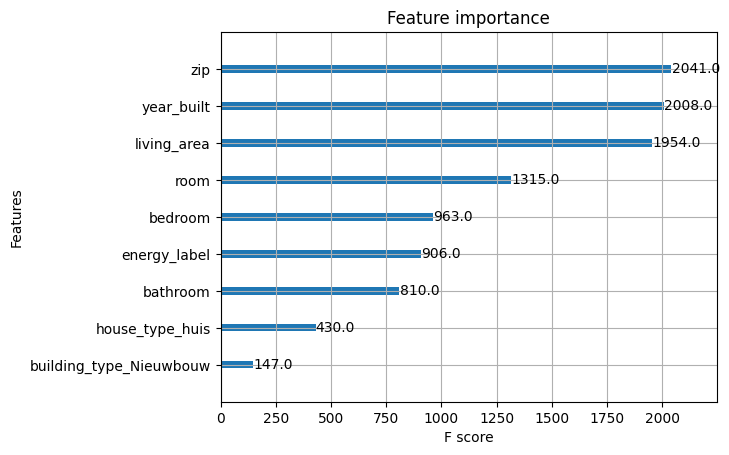

In [221]:
from xgboost import plot_importance
plot_importance(XGB_best)
plt.show()

In [222]:
r2_train = performance_metric(y1_train, XGB_best.predict(X_train)).round(2)
r2_test = performance_metric(y1_test, XGB_best.predict(X_test)).round(2)
print ("R2 train: ", r2_train)
print ("R2 test: ", r2_test)
''' 

'''

R2 train:  0.98
R2 test:  0.85


' \n\n'

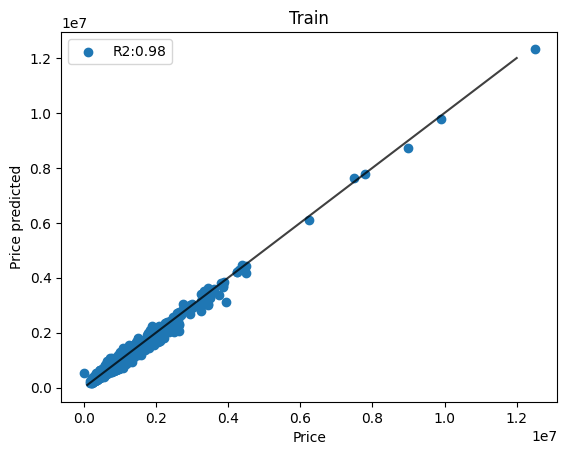

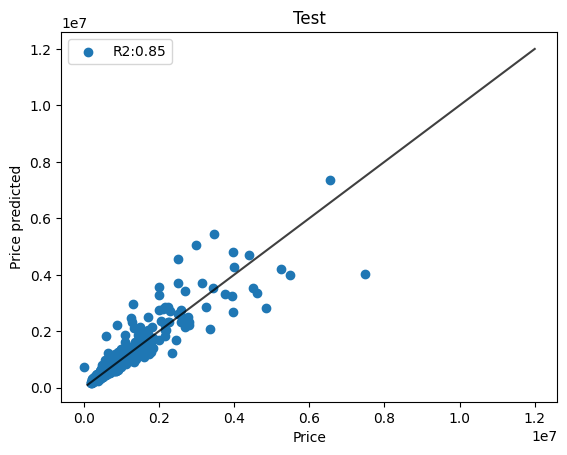

In [223]:
plt.scatter((y1_train), (gsXGB.predict(X_train)),label='R2:'+str(round(r2_train,4)))
plt.title('Train')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.plot([100000,12000000], [100000,12000000], 'k-', alpha=0.75)
plt.legend()
plt.show()
plt.scatter((y1_test), gsXGB.predict(X_test),label='R2:'+str(round(r2_test,4)))
plt.plot([100000,12000000], [100000,12000000], 'k-', alpha=0.75)
plt.title('Test')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.legend()
plt.show()